Original Dataset:
    Employee_ID     Name  Age Department    Salary  Experience
0          101     John   28         HR   50000.0           3
1          102    Alice   32         IT   75000.0           6
2          103      Bob   45    Finance  120000.0          15
3          104  Charlie   25         HR   48000.0           2
4          105      Eve   29         IT   70000.0           5
5          106    Frank   51    Finance  150000.0          20
6          107    Grace   26         IT       NaN           4
7          108     John   28         HR   50000.0           3
8          109    Harry   60    Finance  200000.0          30
9          110      Ivy   24         IT   65000.0           3

Missing values before handling:
 Employee_ID    0
Name           0
Age            0
Department     0
Salary         1
Experience     0
dtype: int64

Missing values after handling:
 Employee_ID    0
Name           0
Age            0
Department     0
Salary         0
Experience     0
dtype: int64

D

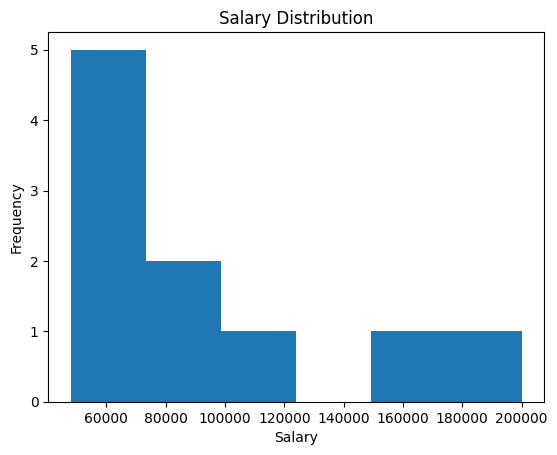

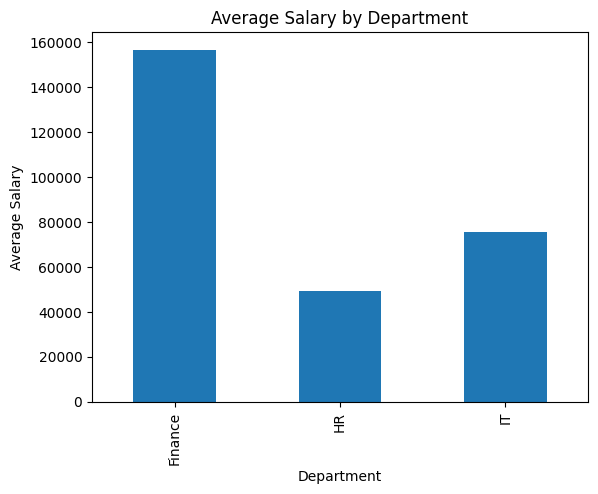

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Create Dataset
# -----------------------------
data = {
    "Employee_ID": [101,102,103,104,105,106,107,108,109,110],
    "Name": ["John","Alice","Bob","Charlie","Eve","Frank","Grace","John","Harry","Ivy"],
    "Age": [28,32,45,25,29,51,26,28,60,24],
    "Department": ["HR","IT","Finance","HR","IT","Finance","IT","HR","Finance","IT"],
    "Salary": [50000,75000,120000,48000,70000,150000,None,50000,200000,65000],
    "Experience": [3,6,15,2,5,20,4,3,30,3]
}

df = pd.DataFrame(data)

print("Original Dataset:\n", df)

# -----------------------------
# 1. Detect and Handle Missing Values (Salary)
# -----------------------------
print("\nMissing values before handling:\n", df.isnull().sum())

# Fill missing salary with mean salary
df["Salary"]=df["Salary"].fillna(df["Salary"].mean())

print("\nMissing values after handling:\n", df.isnull().sum())

# -----------------------------
# 2. Remove Duplicate Entries
# -----------------------------
df = df.drop_duplicates()

print("\nDataset after removing duplicates:\n", df)

# -----------------------------
# 3. Identify and Treat Outliers in Age Column
#    (Using IQR Method)
# -----------------------------
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df["Age"] = df["Age"].clip(lower_bound, upper_bound)

# -----------------------------
# 4. Salary Distribution (Histogram)
# -----------------------------
plt.figure()
plt.hist(df["Salary"], bins=6)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

# -----------------------------
# 5. Average Salary by Department (Bar Plot)
# -----------------------------
avg_salary = df.groupby("Department")["Salary"].mean()

plt.figure()
avg_salary.plot(kind="bar")
plt.title("Average Salary by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()
